In [5]:
import pandas_datareader.data as pdr

start = "1949/5/16"
end="2017/9/30"

Nikkei225 = pdr.DataReader("NIKKEI225", "fred", start, end)
Nikkei225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [6]:
Nikkei225.tail(1)

,NIKKEI225
DATE,
2017-09-29,20356.28


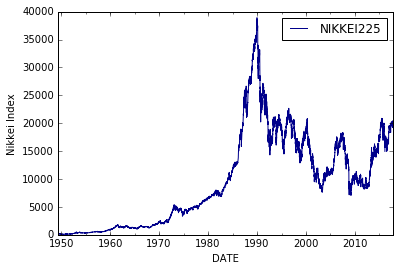

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
Nikkei225.plot(color = 'darkblue')
plt.ylabel('Nikkei Index')

In [8]:
price = pdr.DataReader("^N225", "yahoo", "1984/1/4", end)
price.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-01-04,9927.110352,9927.110352,9927.110352,9927.110352,9927.110352,0.0


In [9]:
print(price.tail(1))

                    Open          High           Low         Close  \
Date                                                                 
2017-09-29  20315.339844  20370.330078  20285.060547  20356.279297   

               Adj Close  Volume  
Date                              
2017-09-29  20356.279297     0.0  


# 日経平均とドル円の相関関係

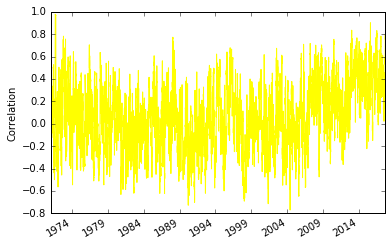

In [19]:
import pandas as pd
fx = pdr.DataReader("DEXJPUS", "fred", start, end)
port = pd.concat([price.Close, fx], axis = 1).dropna()
n = port.Close.pct_change().dropna()
f = port.DEXJPUS.pct_change().dropna()
f.rolling(window = 20).corr(n).plot(color = "yellow")
plt.ylabel("Correlation")

# バブル以降の日経平均

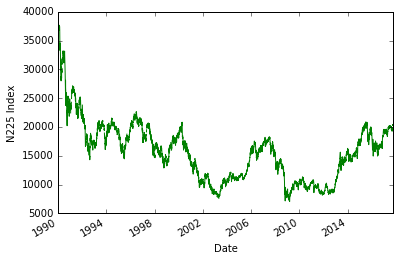

In [24]:
price = pdr.DataReader("^N225", "yahoo", start, end)
price1 = price.ix["1990/1/1":]
price1.Close.plot(color = "green")
price2 = price.ix["2017", 0:2]
plt.ylabel("N225 Index")
price2.tail(1)